In [92]:
#importing all important libraries ...
import os
pd.set_option("display.max_columns", 100)
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')


In [22]:
training_set_labels_df = pd.read_csv('/content/training_set_labels.csv')
training_set_features_df= pd.read_csv('/content/training_set_features.csv')




In [3]:
training_set_labels_df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
training_set_features_df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
training_set_labels_df.describe()

,respondent_id,xyz_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [6]:
training_set_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   xyz_vaccine       26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [7]:

print(training_set_features_df.shape)
training_set_features_df.describe()

(26707, 36)


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [8]:
p =training_set_features_df.isna().sum().sort_values(ascending=False)
x =p/len(training_set_features_df)
print(x)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_seasonal           0.080878
doctor_recc_xyz                0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_xyz_sick_from_vacc     0.014790
opinion_xyz_vacc_effective     0.014640
opinion_xyz_risk               0.014528
household_children             0.009323
household_adults               0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
xyz_knowledge                  0.004343
xyz_concern                    0.003445


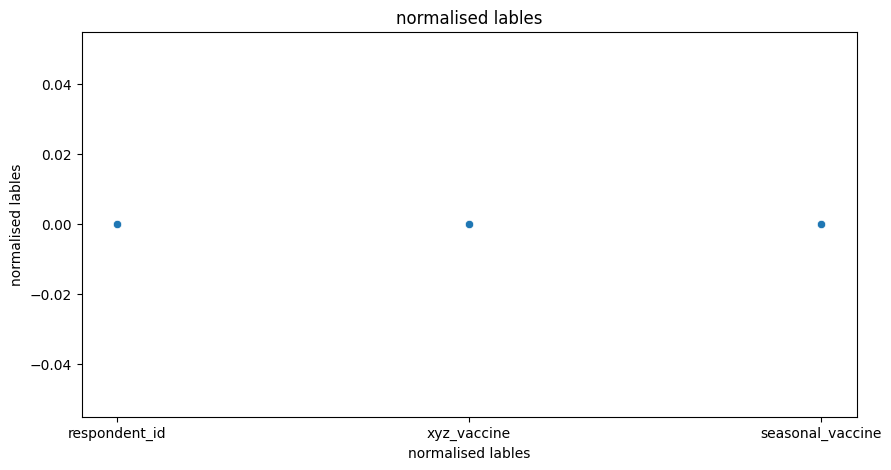

In [9]:
x =training_set_labels_df.isna().sum().sort_values(ascending=False)
x =x/len(training_set_labels_df)
plt.figure(figsize=(10, 5))
sns.scatterplot(x )
plt.title('normalised lables')
plt.xlabel('normalised lables')
plt.ylabel('normalised lables')
plt.show()

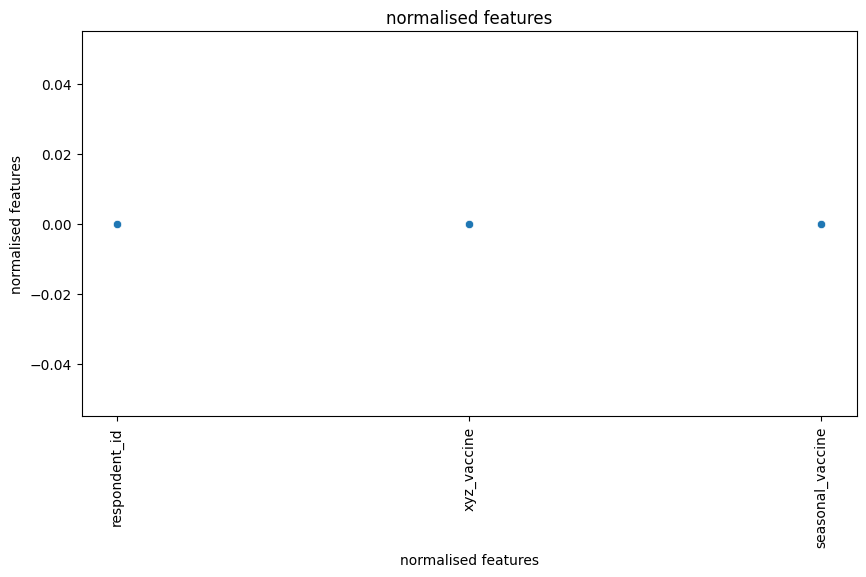

In [10]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x )
plt.xticks(rotation=90)
plt.title('normalised features')
plt.xlabel('normalised features')
plt.ylabel('normalised features')
plt.show()

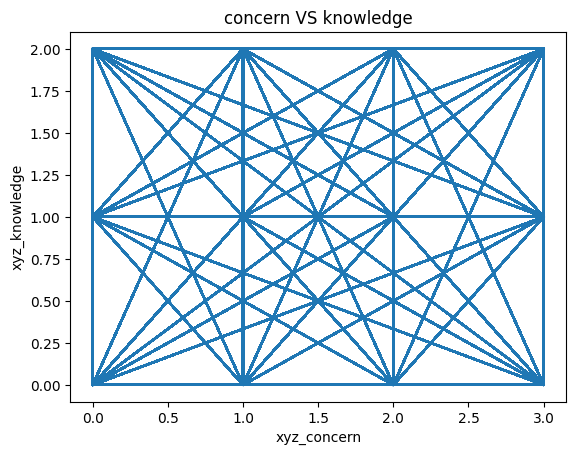

In [11]:
plt.style.use('default')
plt.plot(training_set_features_df['xyz_concern'], training_set_features_df['xyz_knowledge'])
plt.title('concern VS knowledge')
plt.xlabel('xyz_concern')
plt.ylabel('xyz_knowledge')
plt.show()

<Figure size 1000x500 with 0 Axes>

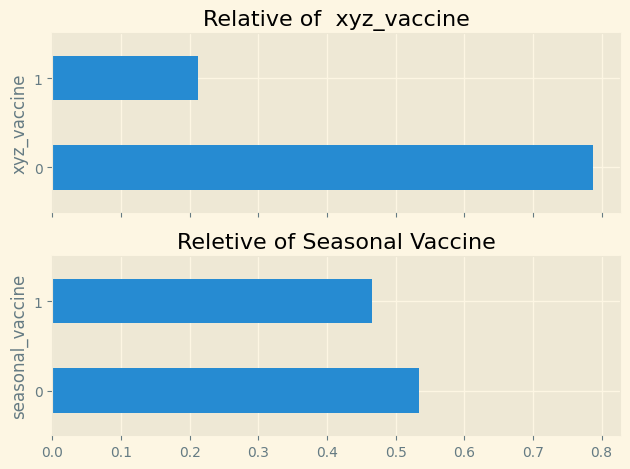

In [12]:
#plotting graph .......
plt.figure(figsize=(10, 5) )
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(2, 1,    sharex=True)

n_obs = training_set_labels_df.shape[0]



(training_set_labels_df['xyz_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Relative of  xyz_vaccine", ax=ax[0])
)
ax[0].set_ylabel("xyz_vaccine")

(training_set_labels_df['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Reletive of Seasonal Vaccine", ax=ax[1])
)


ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [13]:
df =pd.crosstab(training_set_labels_df["xyz_vaccine"], training_set_labels_df["seasonal_vaccine"], margins=True,normalize=True)
training_set_labels_df["xyz_vaccine"].corr(training_set_labels_df["seasonal_vaccine"], method="pearson")

0.37714265306144473

In [14]:
df

seasonal_vaccine,0,1,All
xyz_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [6]:
total_train = training_set_features_df.join(training_set_labels_df, lsuffix='_labels', rsuffix='_features')

In [7]:
total_train.head()

,respondent_id_labels,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id_features,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [17]:
print(total_train[['xyz_concern', 'xyz_vaccine']].groupby(['xyz_concern', 'xyz_vaccine']).size().unstack('xyz_vaccine'))


xyz_vaccine     0     1
xyz_concern            
0.0          2849   447
1.0          6756  1397
2.0          8102  2473
3.0          3250  1341


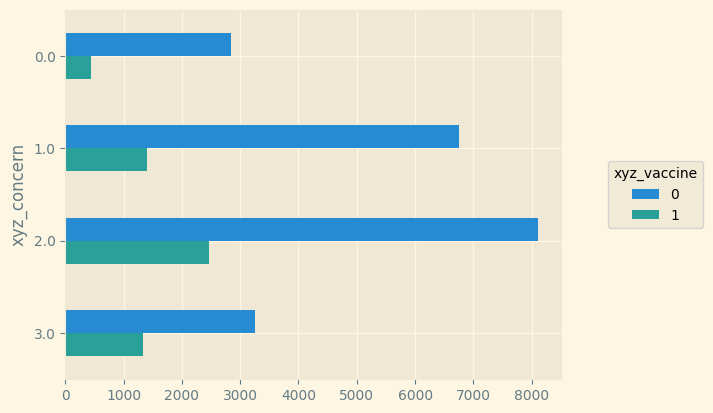

In [18]:
ax = total_train[['xyz_concern', 'xyz_vaccine']].groupby(['xyz_concern', 'xyz_vaccine']).size().unstack('xyz_vaccine').plot.barh()
ax.invert_yaxis()
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='xyz_vaccine')

In [19]:
xyz_concern_counts = total_train[['xyz_concern', 'xyz_vaccine']].groupby(['xyz_concern', 'xyz_vaccine']).size().unstack('xyz_vaccine').sum(axis='columns')
xyz_concern_counts

xyz_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [20]:
props = total_train[['xyz_concern', 'xyz_vaccine']].groupby(['xyz_concern', 'xyz_vaccine']).size().unstack('xyz_vaccine').div(xyz_concern_counts, axis='index')
props

xyz_vaccine,0,1
xyz_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


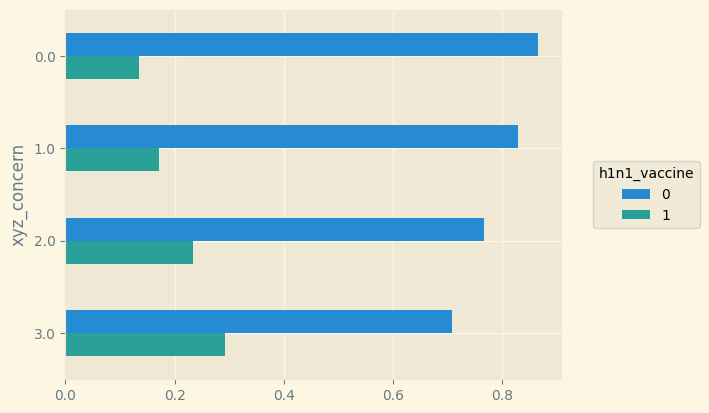

In [21]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),title='h1n1_vaccine')

In [22]:
total_train.isna().sum().sort_values(ascending=False)/len(total_train)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_seasonal           0.080878
doctor_recc_xyz                0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_xyz_sick_from_vacc     0.014790
opinion_xyz_vacc_effective     0.014640
opinion_xyz_risk               0.014528
household_adults               0.009323
household_children             0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
xyz_knowledge                  0.004343
xyz_concern                    0.003445


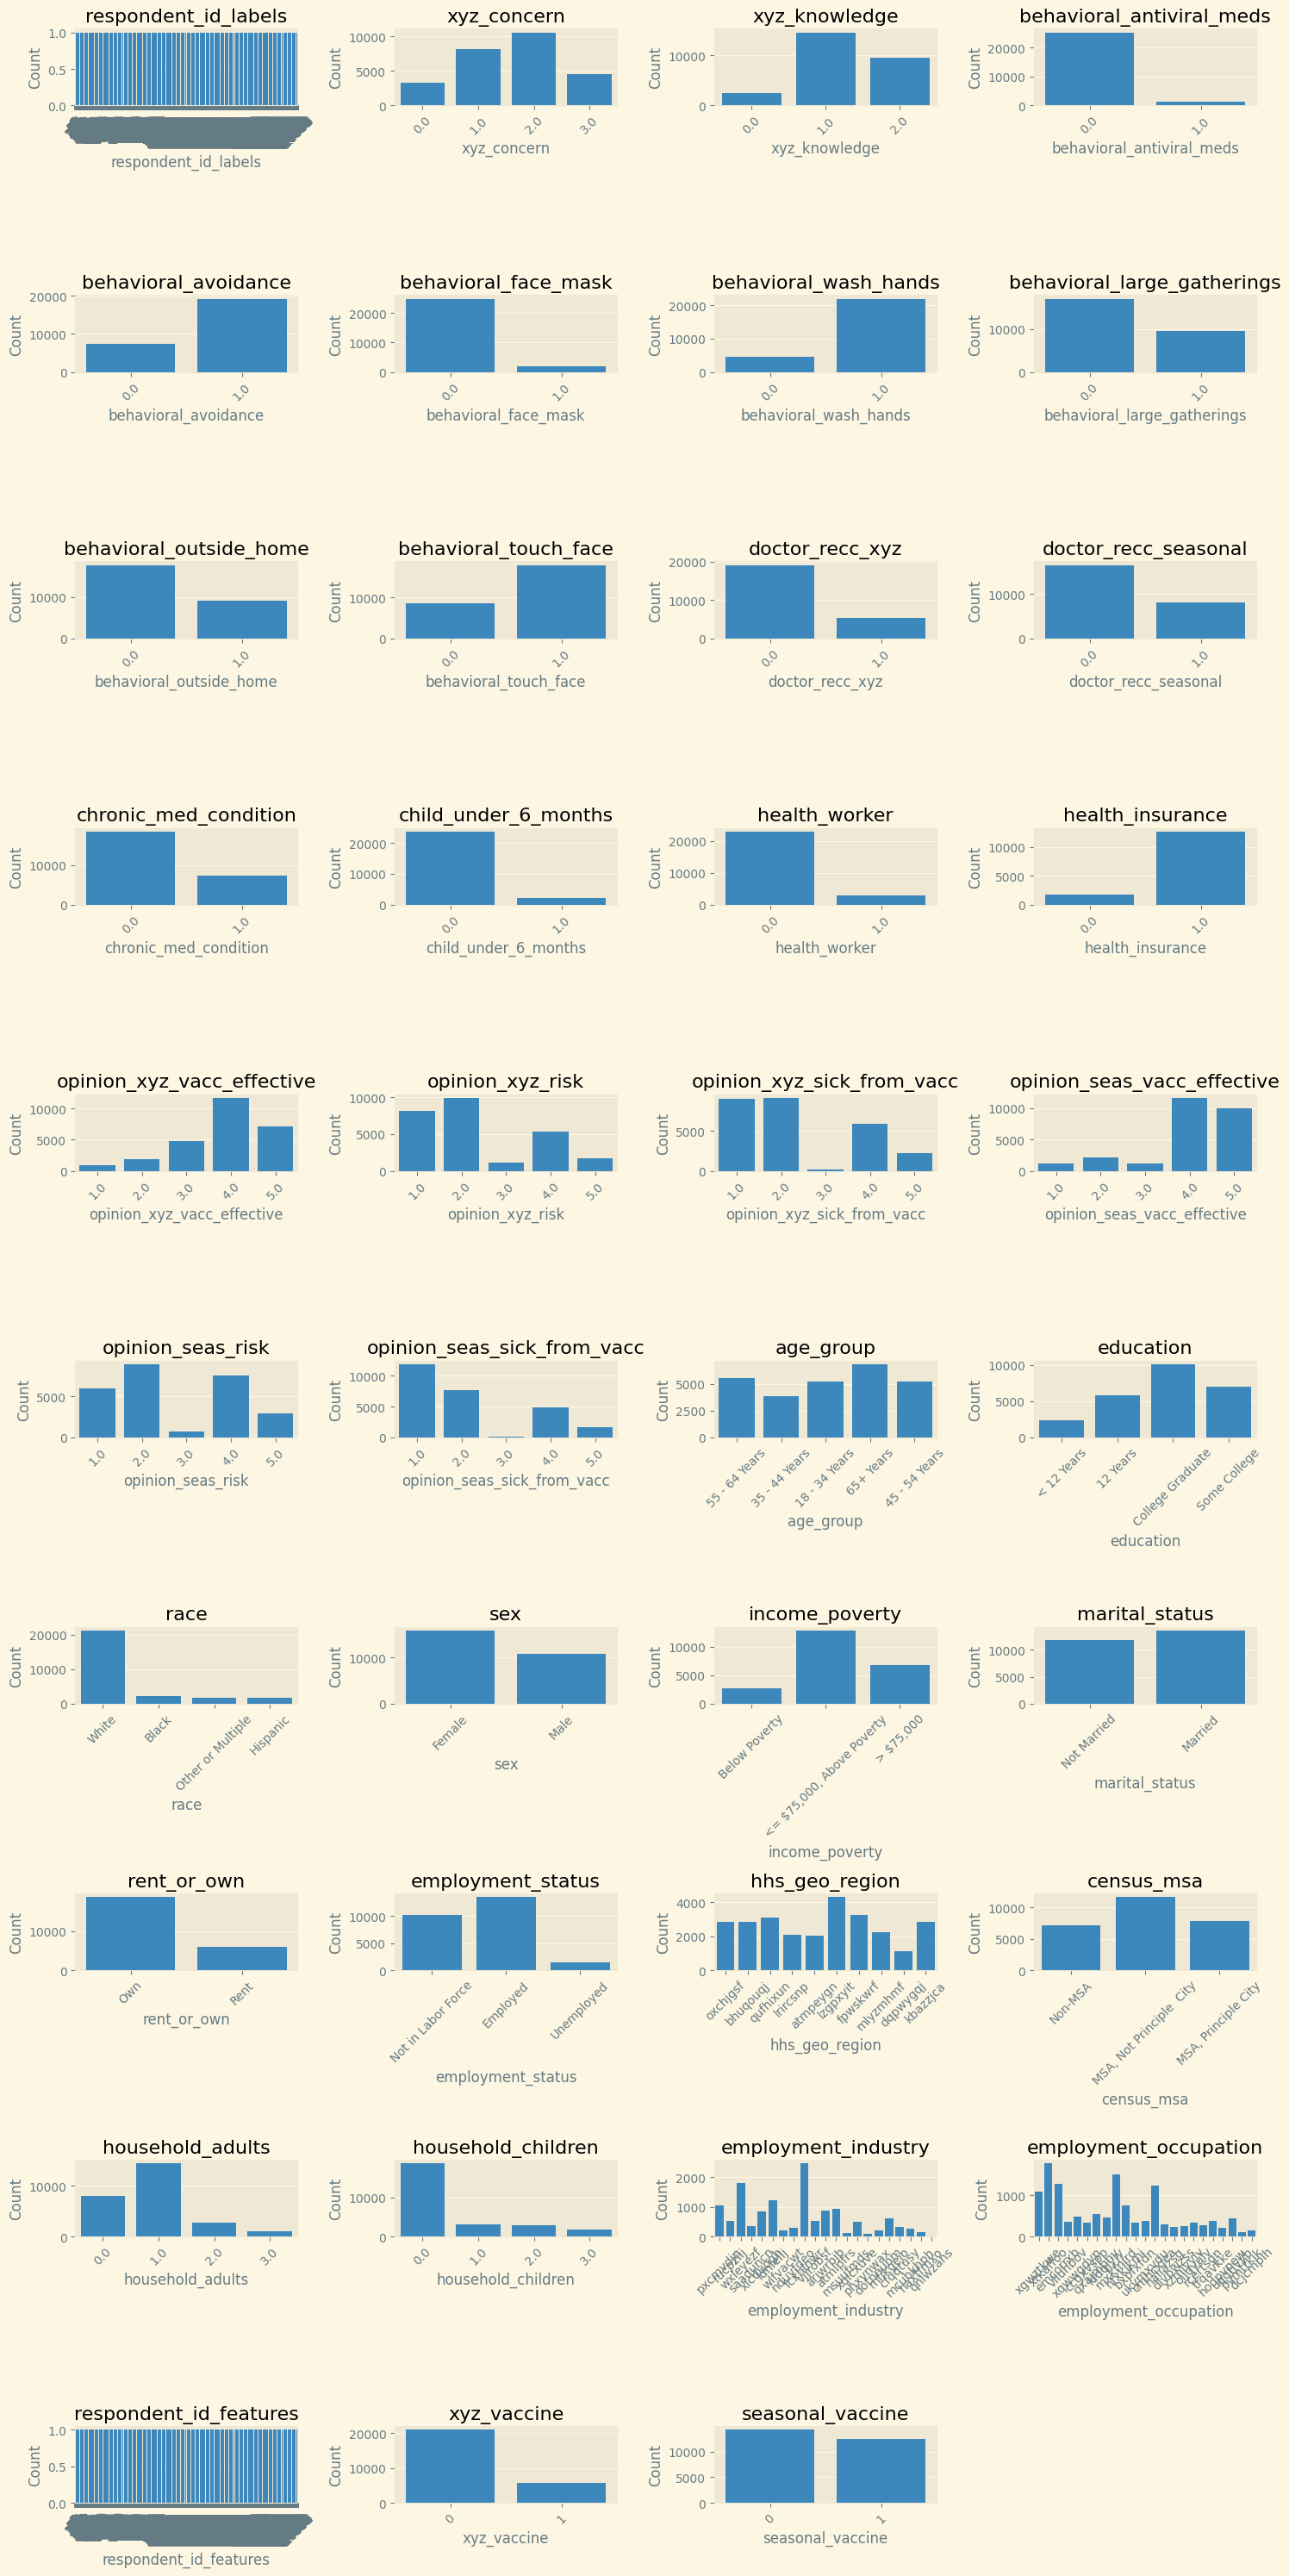

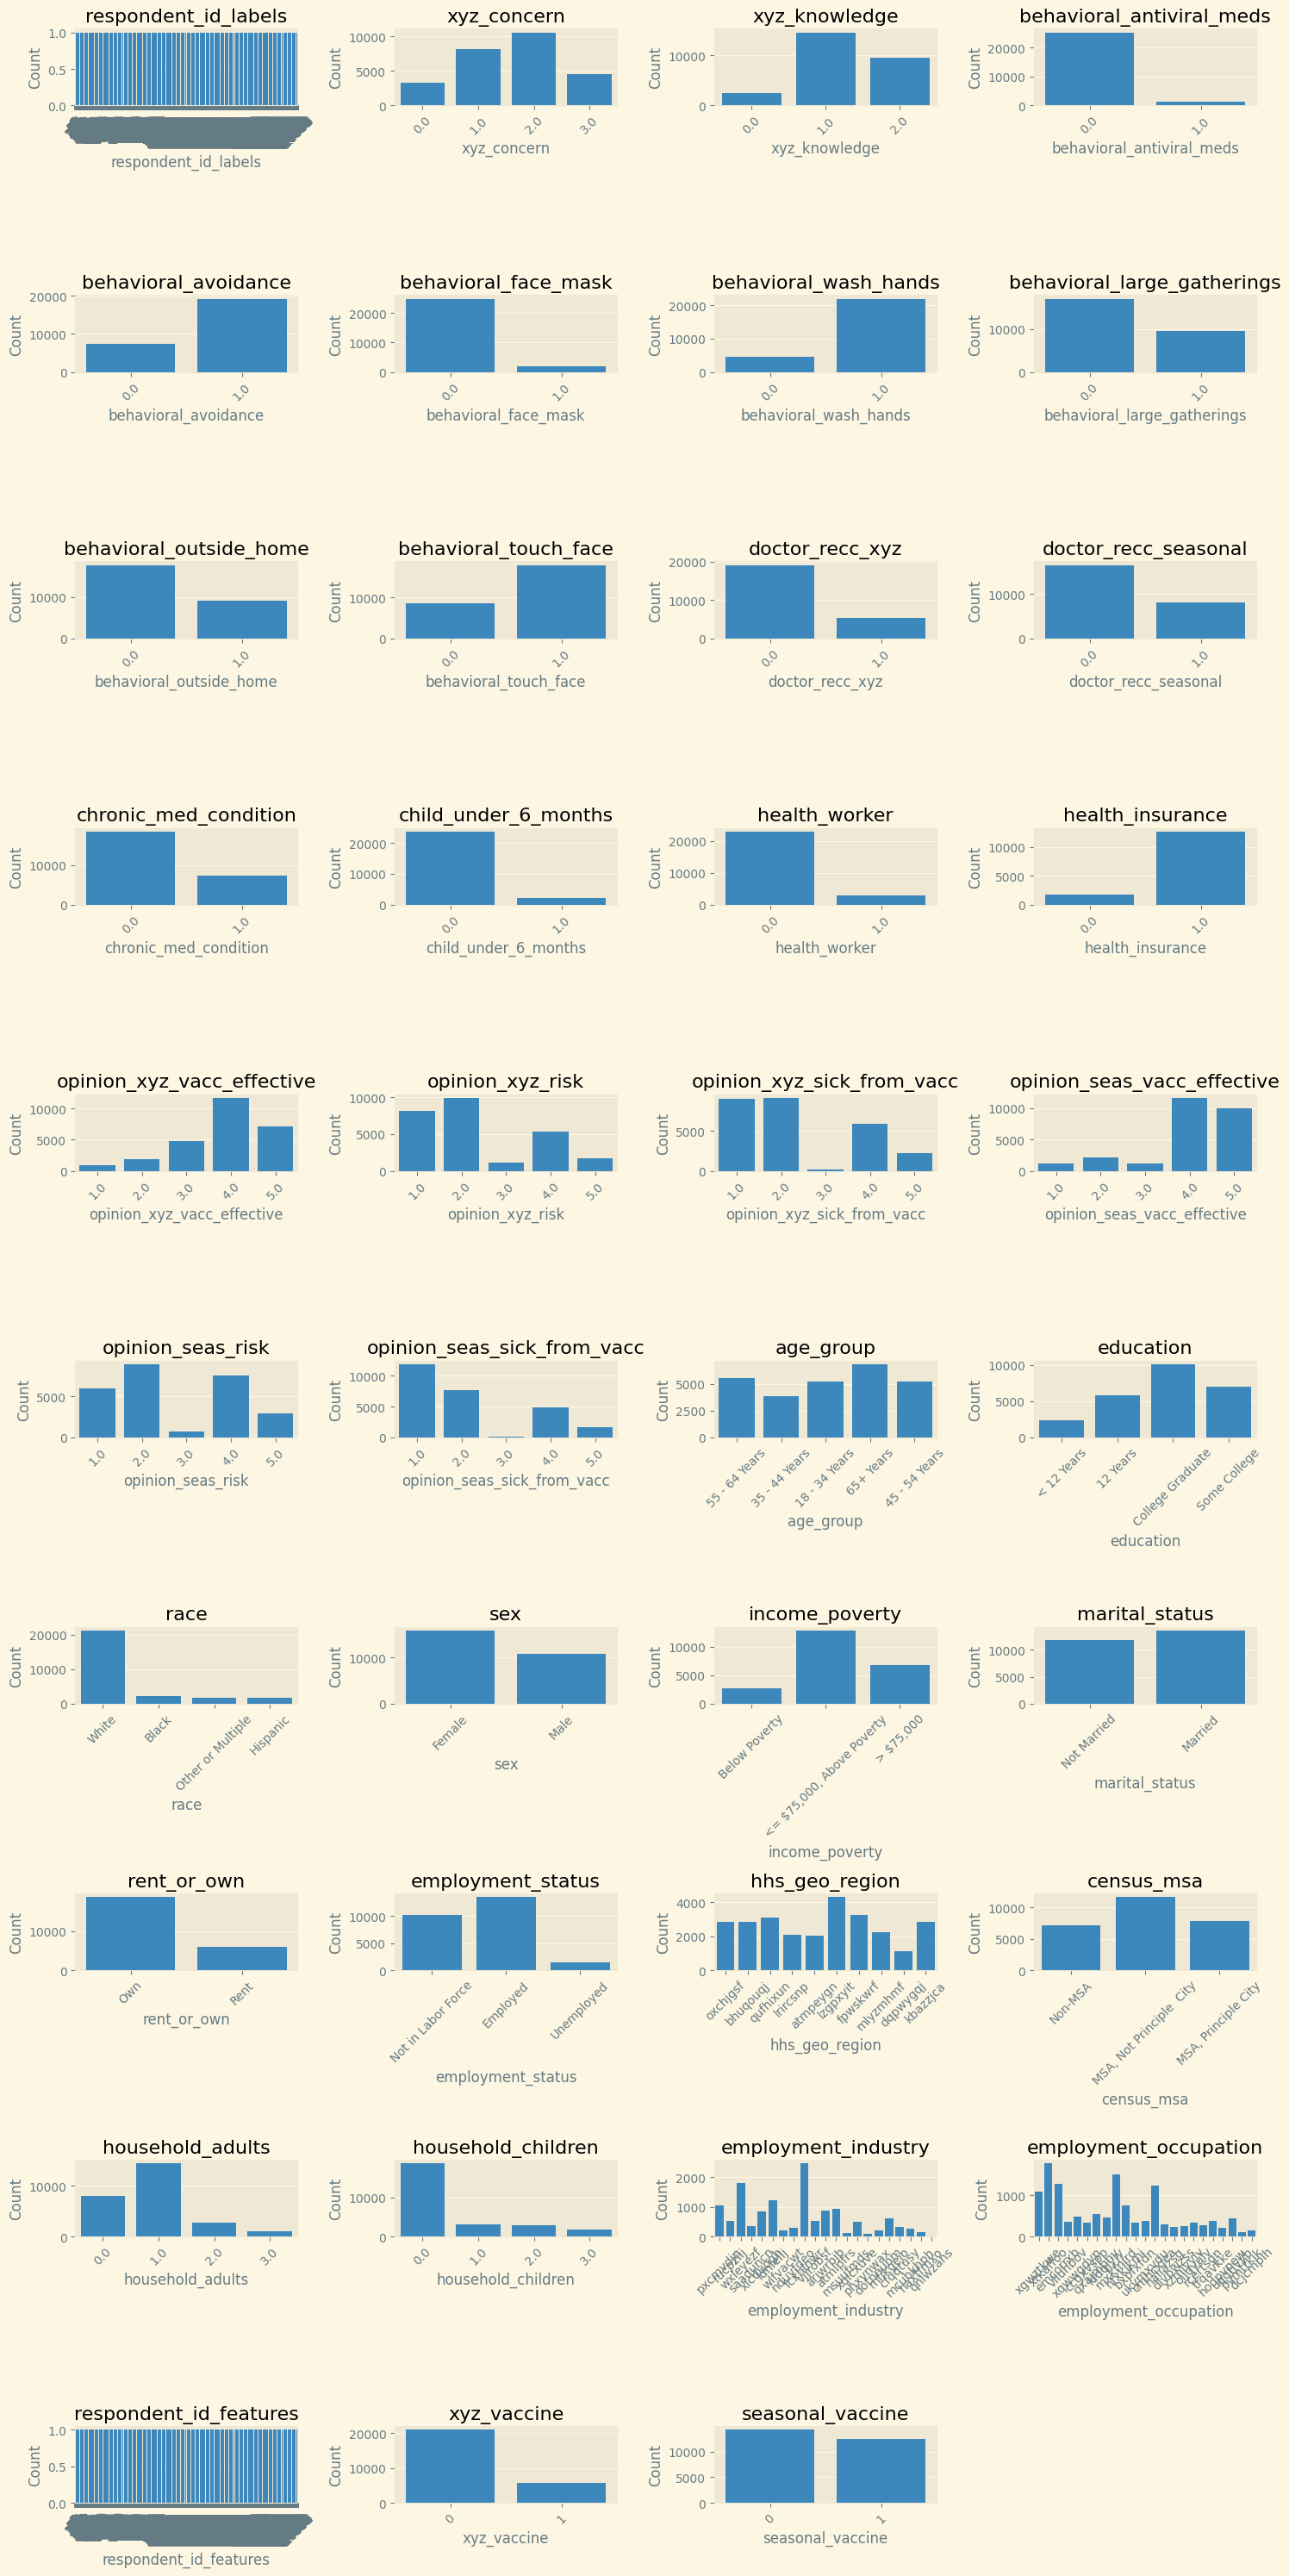

In [23]:
# Plot Categories
columns = total_train.columns

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate the distribution plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=total_train, ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Calculate the number of rows and columns for the subplots
num_rows = (len(columns) + 3) // 4
num_cols = min(len(columns), 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Generate the distribution plots
for i, column in enumerate(columns):
    sns.countplot(x=column, data=total_train, ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel("Count")

# Remove any empty subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
numeric_cols = training_set_features_df.columns[training_set_features_df.dtypes != "object"].values
print(numeric_cols)

['respondent_id' 'xyz_concern' 'xyz_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_xyz' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_xyz_vacc_effective' 'opinion_xyz_risk'
 'opinion_xyz_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [12]:
numeric_preprocessing_steps = Pipeline([('standard_scaler', StandardScaler()),('simple_imputer', SimpleImputer(strategy='median'))])
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

estimators = MultiOutputClassifier(estimator=LogisticRegression(penalty="l2", C=1))

get_pipeline = Pipeline([("preprocessor", preprocessor),("estimators", estimators),])

get_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective',
       'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    training_set_features_df,
    training_set_labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=training_set_labels_df,
    random_state=6
)


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [58]:
for col in training_set_labels_df.columns:
    print(f"Class distribution for {col}:")
    print(training_set_labels_df[col].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    training_set_features_df,
    training_set_labels_df,
    test_size=0.33,
    shuffle=True,
    random_state=6
)

Class distribution for respondent_id:
respondent_id
26706    1
0        1
1        1
2        1
3        1
        ..
22       1
23       1
24       1
25       1
26       1
Name: count, Length: 26707, dtype: int64
Class distribution for xyz_vaccine:
xyz_vaccine
0    21033
1     5674
Name: count, dtype: int64
Class distribution for seasonal_vaccine:
seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder



In [69]:
def data_encoding(data):
    # Replace Binary Categories with 0 and 1
    data['sex'] = data['sex'].replace({'Male': 0, 'Female': 1})
    data['marital_status'] = data['marital_status'].replace({'Not Married': 0, 'Married': 1})
    data['rent_or_own'] = data['rent_or_own'].replace({'Rent': 0, 'Own': 1})

    # Replace Rank Order Categories starting with 0 to number of categories resepctively
    data['age_group'] = data['age_group'].replace({'18 - 34 Years': 0,
                                                               '35 - 44 Years': 1,
                                                               '45 - 54 Years': 2,
                                                               '55 - 64 Years': 3,
                                                               '65+ Years': 4
    })

    data['education'] = data['education'].replace({'< 12 Years': 0,
                                                               '12 Years': 1,
                                                               'Some College': 2,
                                                               'College Graduate': 3
    })

    data['income_poverty'] = data['income_poverty'].replace({'Below Poverty': 0,
                                                                         '<= $75,000, Above Poverty': 1,
                                                                         '> $75,000': 2
    })

    data['employment_status'] = data['employment_status'].replace({'Not in Labor Force': 0,
                                                                               'Unemployed': 1,
                                                                               'Employed': 2
    })

    data['census_msa'] = data['census_msa'].replace({'Non-MSA': 0,
                                                                 'MSA, Not Principle  City': 1,
                                                                 'MSA, Principle City': 2
    })

    # One Hot Encode categories that do not have rank order
    #from sklearn.preprocessing import OneHotEncoder

    # Define the columns to be one hot encoded
    columns_to_encode = ['race', 'hhs_geo_region', 'employment_industry', 'employment_occupation']

    # Create an instance of the OneHotEncoder
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') # Handle unknown categories

    # Fit and transform the selected columns
    encoded_columns = encoder.fit_transform(data[columns_to_encode])

    # Get feature names (for scikit-learn versions 0.20 and above)
    if hasattr(encoder, 'get_feature_names_out'):
        feature_names = encoder.get_feature_names_out(columns_to_encode)
    else:  # For older scikit-learn versions
        feature_names = encoder.get_feature_names(columns_to_encode)

    # Create a dataframe with the encoded columns
    encoded_df = pd.DataFrame(encoded_columns, columns=feature_names)

    # Set index back to DataFrame
    encoded_df.index = data.index

    # Concatenate the encoded dataframe with the original dataframe
    data_encoded = pd.concat([data, encoded_df], axis=1)

    # Drop the original columns that were encoded
    data_encoded.drop(columns_to_encode, axis=1, inplace=True)

    return data_encoded

In [70]:
train_data_encoded = data_encoding(total_train)

train_data_encoded

,respondent_id_labels,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,respondent_id_features,xyz_vaccine,seasonal_vaccine,race_Black,race_Hispanic,race_Other or Multiple,race_White,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,employment_industry_arjwrbjb,employment_industry_atmlpfrs,employment_industry_cfqqtusy,employment_industry_dotnnunm,employment_industry_fcxhlnwr,employment_industry_haxffmxo,employment_industry_ldnlellj,employment_industry_mcubkhph,employment_industry_mfikgejo,employment_industry_msuufmds,employment_industry_nduyfdeo,employment_industry_phxvnwax,employment_industry_pxcmvdjn,employment_industry_qnlwzans,employment_industry_rucpziij,employment_industry_saaquncn,employment_industry_vjjrobsf,employment_industry_wlfvacwt,employment_industry_wxleyezf,employment_industry_xicduogh,employment_industry_xqicxuve,employment_industry_nan,employment_occupation_bxpfxfdn,employment_occupation_ccgxvspp,employment_occupation_cmhcxjea,employment_occupation_dcjcmpih,employment_occupation_dlvbwzss,employment_occupation_emcorrxb,employment_occupation_haliazsg,employment_occupation_hfxkjkmi,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,employment_occupation_nan
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,0.0,1,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,1.0,0,0.0,0.0,0.0,2.0,1,0.0,0.0,1,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,0,3.0,0,1.0,0.0,1.0,2.0,1,2.0,0.0,2,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,4,1.0,1,0.0,0.0,0.0,0.0,2,0.0,0.0,3,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,2,2.0,1,1.0,1.0,1.0,2.0,1,1.0,0.0,4,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

In [71]:
train_data_reencoded = pd.get_dummies(train_data_encoded, columns=train_data_encoded.columns[train_data_encoded.isna().any()], dummy_na=True)

train_data_reencoded.shape

(26707, 180)

In [72]:
for i in train_data_reencoded.drop(columns=[col for col in train_data_reencoded.columns if "_nan" in col]).columns:
    print(i)

train_data_reencoded.drop(columns=[col for col in train_data_reencoded.columns if "_nan" in col]).shape

respondent_id_labels
age_group
sex
census_msa
respondent_id_features
xyz_vaccine
seasonal_vaccine
race_Black
race_Hispanic
race_Other or Multiple
race_White
hhs_geo_region_atmpeygn
hhs_geo_region_bhuqouqj
hhs_geo_region_dqpwygqj
hhs_geo_region_fpwskwrf
hhs_geo_region_kbazzjca
hhs_geo_region_lrircsnp
hhs_geo_region_lzgpxyit
hhs_geo_region_mlyzmhmf
hhs_geo_region_oxchjgsf
hhs_geo_region_qufhixun
employment_industry_arjwrbjb
employment_industry_atmlpfrs
employment_industry_cfqqtusy
employment_industry_dotnnunm
employment_industry_fcxhlnwr
employment_industry_haxffmxo
employment_industry_ldnlellj
employment_industry_mcubkhph
employment_industry_mfikgejo
employment_industry_msuufmds
employment_industry_nduyfdeo
employment_industry_phxvnwax
employment_industry_pxcmvdjn
employment_industry_qnlwzans
employment_industry_rucpziij
employment_industry_saaquncn
employment_industry_vjjrobsf
employment_industry_wlfvacwt
employment_industry_wxleyezf
employment_industry_xicduogh
employment_industry_xqi

(26707, 150)

In [80]:
X = train_data_reencoded.drop(columns=['xyz_vaccine','seasonal_vaccine'], axis=1)
y = train_data_reencoded[['xyz_vaccine']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1)

rf = RandomForestClassifier(random_state=1, n_jobs=-1)

param_grid = {'max_depth': [4,5,6],
              #'min_samples_leaf': [0.25,0.5,0.75],
              #'min_samples_split': [0.25,0.5,0.75],
              'max_features': [0.10,0.15,0.2,'sqrt'],
              'max_samples': [0.25,0.50],
              'class_weight': ['balanced_subsample'],
              'n_estimators': [200]
             }

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

rf_xyz_gscv = GridSearchCV(rf, param_grid, cv=skf, scoring='roc_auc')

rf_xyz_gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             param_grid={'class_weight': ['balanced_subsample'],
                         'max_depth': [4, 5, 6],
                         'max_features': [0.1, 0.15, 0.2, 'sqrt'],
                         'max_samples': [0.25, 0.5], 'n_estimators': [200]},
             scoring='roc_auc')

In [81]:
y_pred_proba_train_xyz = rf_xyz_gscv.predict_proba(X_train)
y_pred_proba_test_xyz = rf_xyz_gscv.predict_proba(X_test)
y_preds_test_xyz= rf_xyz_gscv.predict(X_test)

In [82]:
print(classification_report(y_test, y_preds_test_xyz))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      5258
           1       0.52      0.77      0.62      1419

    accuracy                           0.80      6677
   macro avg       0.72      0.79      0.74      6677
weighted avg       0.84      0.80      0.81      6677



In [83]:
roc_auc_train_RF_xyz= roc_auc_score(y_train, y_pred_proba_train_xyz[:,1])
roc_auc_test_RF_xyz = roc_auc_score(y_test, y_pred_proba_test_xyz[:,1])

print(f'AUROC RF xyzTrain: {roc_auc_train_RF_xyz}'
      f'\nAUROC RF xyz Test: {roc_auc_test_RF_xyz}'
)

AUROC RF xyzTrain: 0.8667728727832082
AUROC RF xyz Test: 0.8636915833612783


In [87]:
def draw_roc_curve(test, pred_proba):
    fpr, tpr, thresholds = roc_curve(test, pred_proba)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    return roc_auc_score(test, pred_proba)


In [93]:
def draw_auc_curve(test, pred_proba):
    fpr, tpr, thresholds = auc_curve(test, pred_proba)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k++')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC Curve')
    plt.show()

    return roc_auc_score(test, pred_proba)


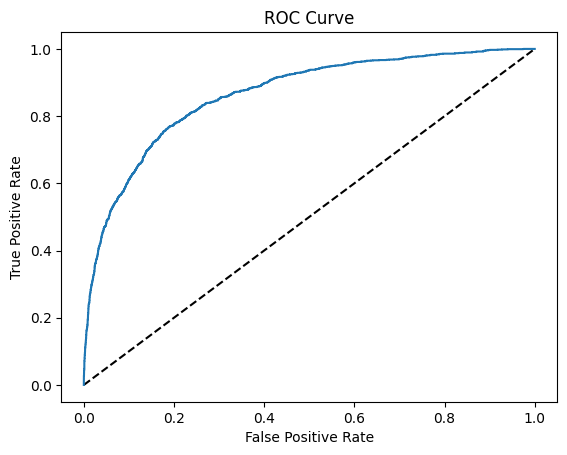

0.8636915833612783

In [94]:
draw_roc_curve(y_test, y_pred_proba_test_xyz[:,1])

[[4229 1029]
 [ 324 1095]]


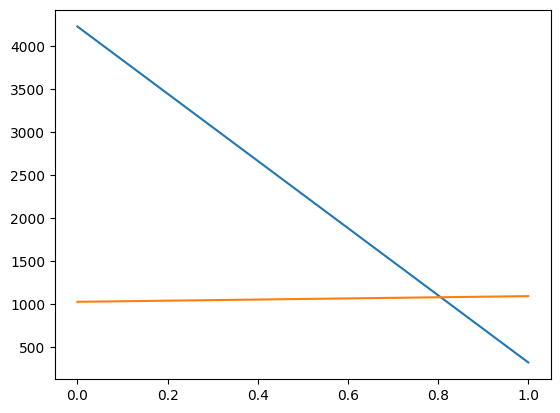

In [97]:
from sklearn.metrics import confusion_matrix

# Get predictions using the fitted model
y_pred = rf_xyz_gscv.predict(X_test)

# Now calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)
plt.plot(cm)

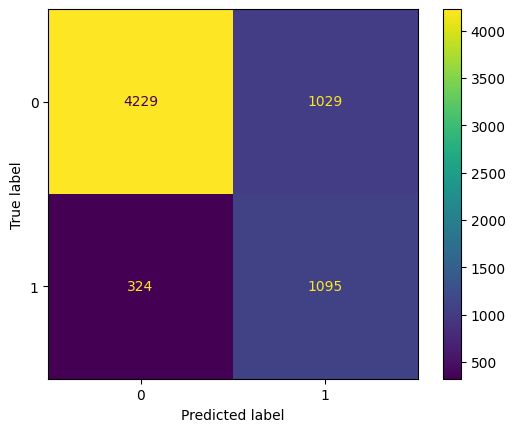

In [99]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()